Continuous Dependent Variable
Regression Problem

# 1. Importing Required Libraries

In [1]:
#importing dataset
import pandas as pd

#math
import numpy as np

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#regression models
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

#metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

#crossval
from sklearn.model_selection import cross_val_score

In [16]:
insurance = pd.read_csv("insurance.csv")
df = insurance.copy()
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


Data has three categorical and four numerical values

In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
sex,1338.0,0.505232,0.500160,0.0000,0.00000,1.000,1.000000,1.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
smoker,1338.0,0.204783,0.403694,0.0000,0.00000,0.000,0.000000,1.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


# 2. Performing an Exploratory Data Analysis

**Examine the distribution of BMI:** \

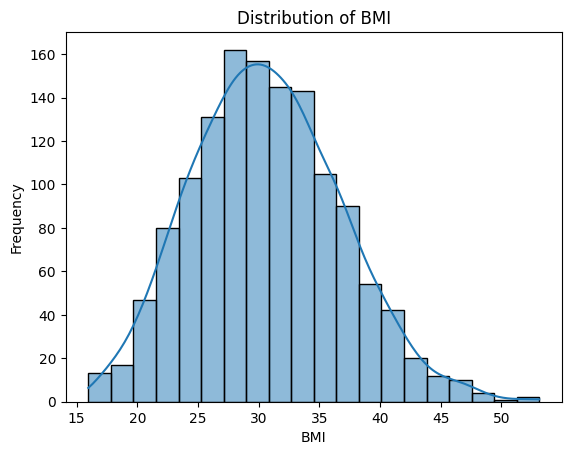

In [35]:
sns.histplot(df['bmi'], bins=20, kde=True)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Distribution of BMI')
plt.show()

In [36]:
# Summary statistics using NumPy
mean_bmi = np.mean(df['bmi'])
median_bmi = np.median(df['bmi'])
std_dev_bmi = np.std(df['bmi'])

print(f"Mean BMI: {mean_bmi:.2f}")
print(f"Median BMI: {median_bmi:.2f}")
print(f"Standard Deviation of BMI: {std_dev_bmi:.2f}")

Mean BMI: 30.66
Median BMI: 30.40
Standard Deviation of BMI: 6.10


Distribution shows that the tail on the right side is longer than left side. This means the distribution is slightly right skewed (positive skew). This deduction is further supported by the relationship between the mean and median, where the mean is greater than the median. Since the standard deviation is 6.10, BMI values diversify moderately around the mean value.

**Examine the relationship between "smoker" and "charges"**

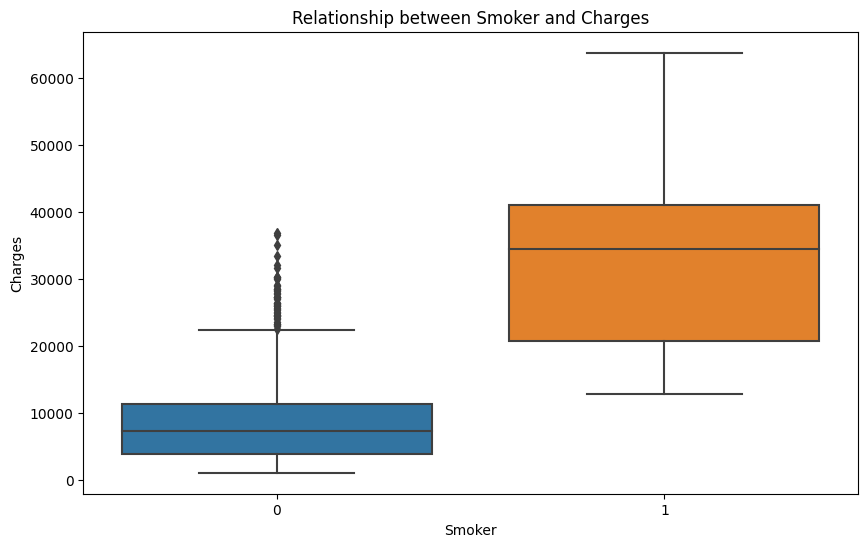

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Relationship between Smoker and Charges')
plt.show()

In [40]:
# Calculate statistics for charges of smokers and non-smokers
smoker_charges = df[df['smoker'] == 'yes']['charges']
non_smoker_charges = df[df['smoker'] == 'no']['charges']

# Calculate mean, median, and standard deviation
mean_charges_smoker = smoker_charges.mean()
median_charges_smoker = smoker_charges.median()
std_dev_charges_smoker = smoker_charges.std()

mean_charges_non_smoker = non_smoker_charges.mean()
median_charges_non_smoker = non_smoker_charges.median()
std_dev_charges_non_smoker = non_smoker_charges.std()

# Print the results
print("Charges for Smokers:")
print(f"Mean: {mean_charges_smoker:.2f}")
print(f"Median: {median_charges_smoker:.2f}")
print(f"Standard Deviation: {std_dev_charges_smoker:.2f}")
print()

print("Charges for Non-Smokers:")
print(f"Mean: {mean_charges_non_smoker:.2f}")
print(f"Median: {median_charges_non_smoker:.2f}")
print(f"Standard Deviation: {std_dev_charges_non_smoker:.2f}")

Charges for Smokers:
Mean: nan
Median: nan
Standard Deviation: nan

Charges for Non-Smokers:
Mean: nan
Median: nan
Standard Deviation: nan


The above graph clearly shows that smorkers have higher medical charges than non-smokers. On average, smokers have medical charges of around 32050 dollars while non-smokers have much lower average medical charges, around 8434 dollars.

**Examine the relationship between "smoker" and "region"**

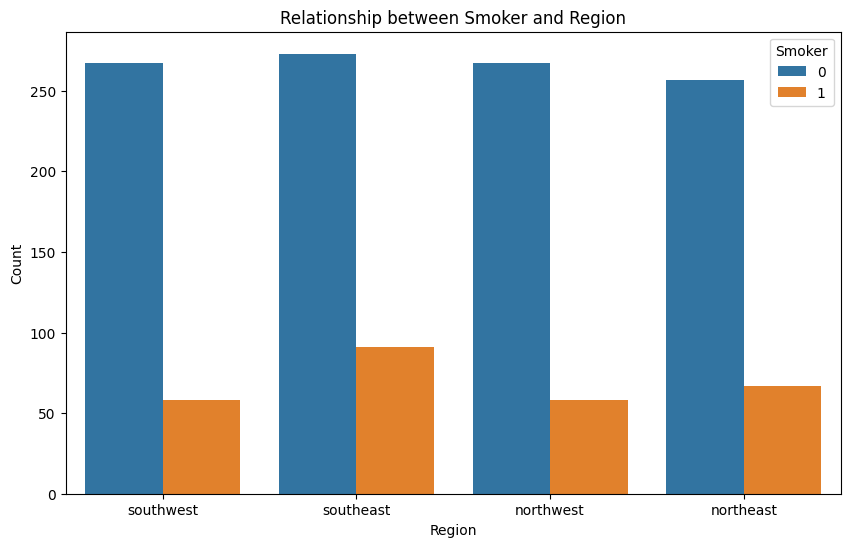

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(x='region', hue='smoker', data=df)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Relationship between Smoker and Region')
plt.legend(title='Smoker')
plt.show()

In [43]:
# percentage of smokers within each region
smoker_percentage_by_region = df.groupby('region')['smoker'].value_counts(normalize=True).unstack().fillna(0) * 100
print(smoker_percentage_by_region)

smoker             0          1
region                         
northeast  79.320988  20.679012
northwest  82.153846  17.846154
southeast  75.000000  25.000000
southwest  82.153846  17.846154


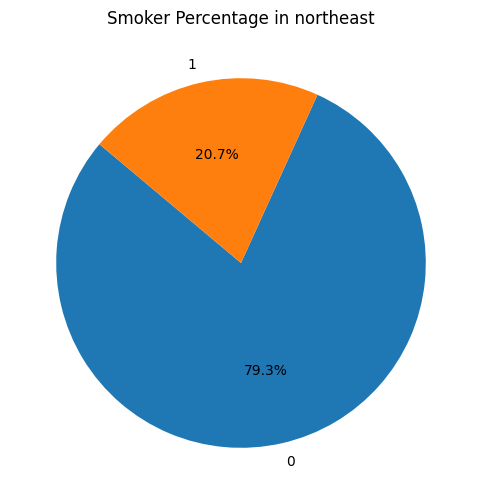

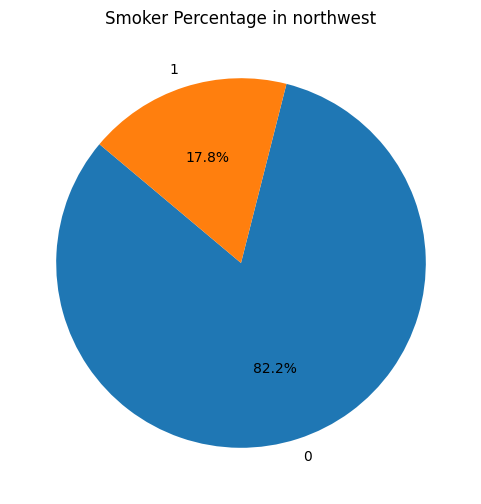

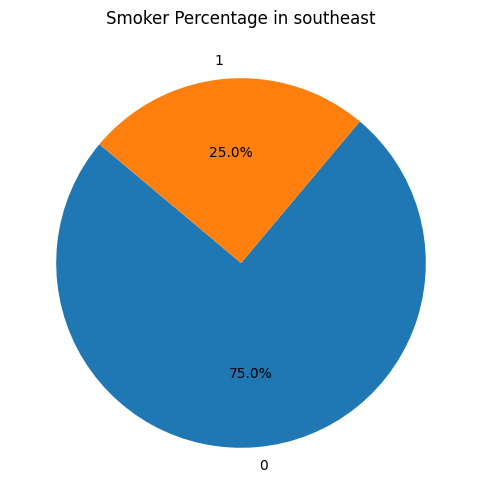

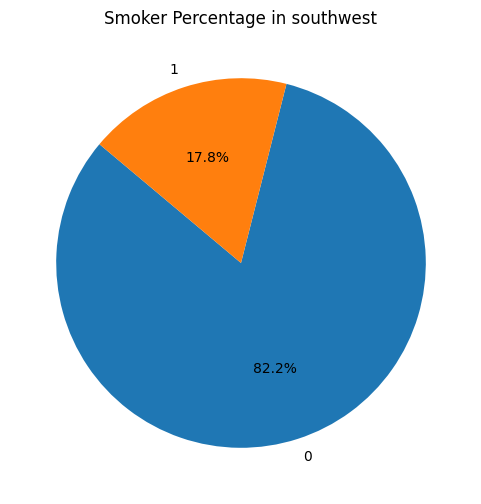

In [44]:
# pie chart for each region
for region in smoker_percentage_by_region.index:
    percentages = smoker_percentage_by_region.loc[region]
    plt.figure(figsize=(6, 6))
    plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Smoker Percentage in {region}')
    plt.show()

In [45]:
# Count the number of people in each region
region_counts = df['region'].value_counts()

print("Number of people in each region:")
print(region_counts)

Number of people in each region:
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


All regions have a higher percentage of non-smokers. In the Northeast region, a larger proportion of individuals are non-smokers (79.32%) compared to smokers (20.68%). Similar to the Northwest region, the Southwest region also has a higher percentage of non-smokers (82.15%) compared to smokers (17.85%). In the Southeast region, there is a relatively lower proportion of non-smokers (75.00%) and a higher proportion of smokers (25.00%).

**Examine the relationship between "BMI" and "sex"**

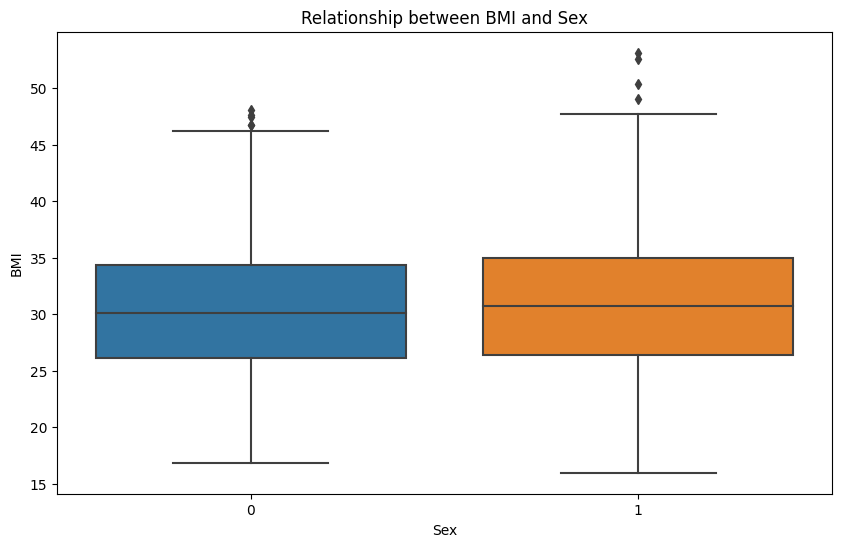

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='bmi', data=df)
plt.xlabel('Sex')
plt.ylabel('BMI')
plt.title('Relationship between BMI and Sex')
plt.show()

The graph above indicates that males have a slightly broader range of BMI values than females. Further examination is necessary across different age groups or other demographic categories to gain a better understanding of the BMI distribution.

**Find the "region" within the most "children"**

In [47]:
region_with_most_children = df[df['children'] == df['children'].max()]['region'].value_counts().idxmax()

print(f"The region with the most children is: {region_with_most_children}")

The region with the most children is: southwest


**Examine the relationship between "age" and "BMI"**

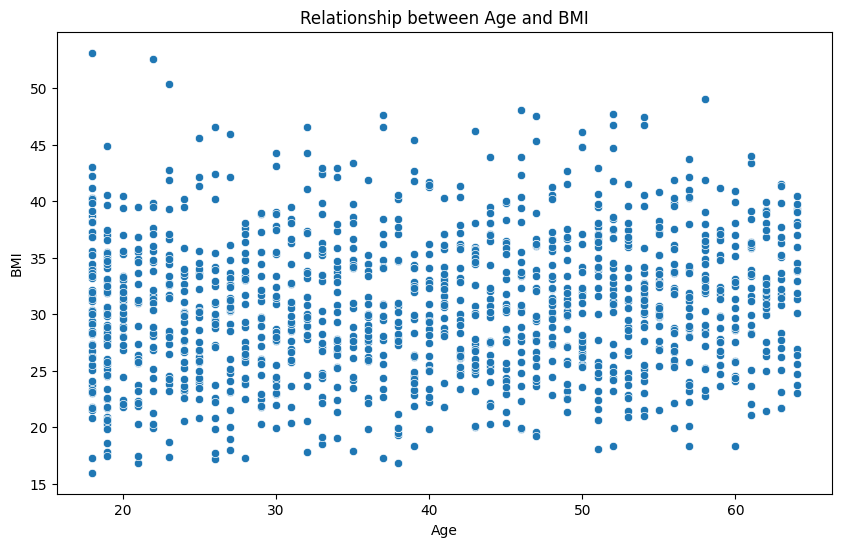

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='bmi', data=df)
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Relationship between Age and BMI')
plt.show()

The points on the scatter plot are scattered randomly without forming any distinct pattern which shows no correlation between "age" and "BMI".

**Examine the relationship between "BMI" and "children"**

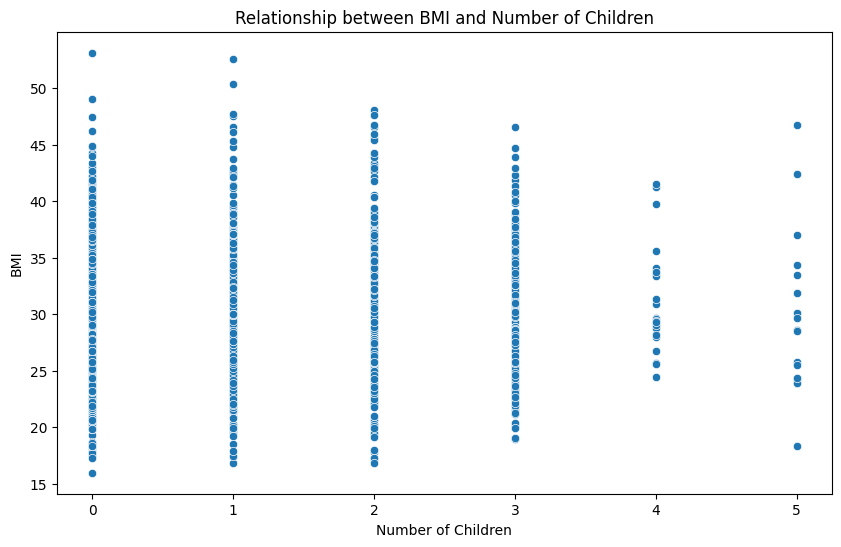

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='children', y='bmi', data=df)
plt.xlabel('Number of Children')
plt.ylabel('BMI')
plt.title('Relationship between BMI and Number of Children')
plt.show()


There is a relationship between the number of children and BMI up to 4 children, but this relationship weakens or disappears when the number of children reaches 5. This indicates that individuals with more children tend to have slightly lower BMI values due to increased physical activity for parenting responsibilities or changes in eating habits.

**Is there an outliner in the "BMI" variable?**

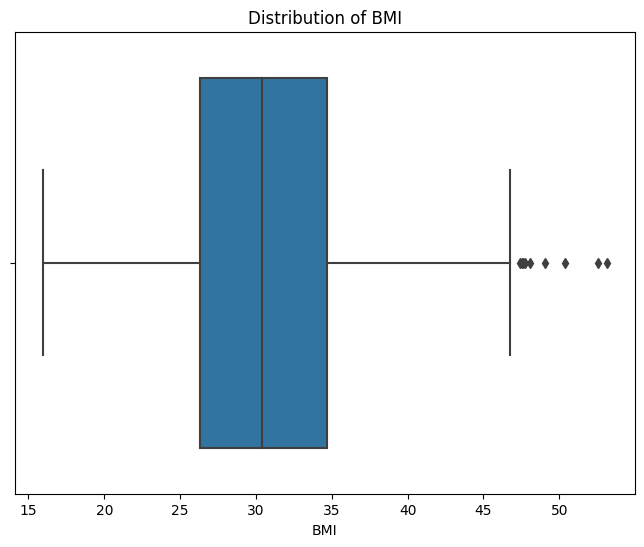

In [51]:
# Create a box plot to visualize the distribution of BMI
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['bmi'])
plt.xlabel('BMI')
plt.title('Distribution of BMI')
plt.show()

Outliers, shown as points located on the right side of the lines extending vertically from the boxes, indicate that there are some unusually high values in the 'BMI' variable.

**Examine the relationship between "BMI" and "charges"**

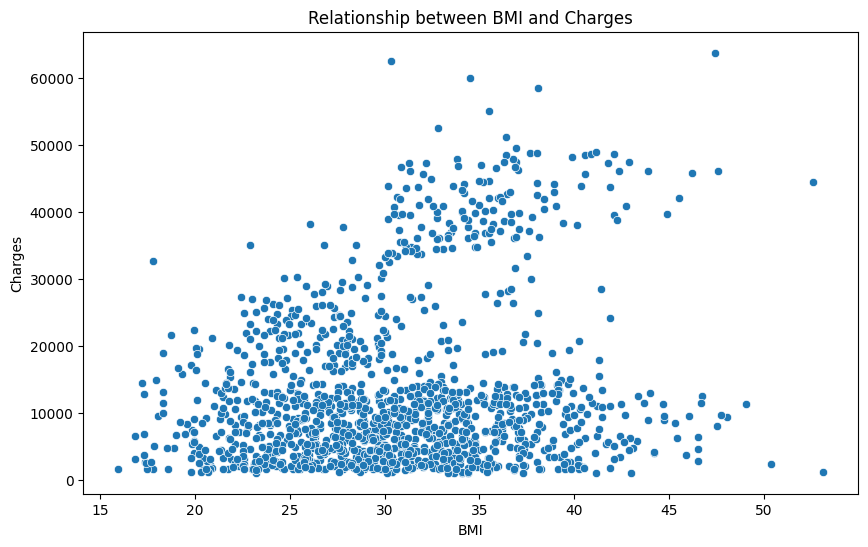

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', data=df)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Relationship between BMI and Charges')
plt.show()

The accumulation of data points around under 10,000 dollars suggests that there's a concentration of medical expenses that are relatively low.The upward trend in expenses indicates that there's a positive correlation between age and medical expenses. As age increases beyond 30, medical expenses tend to rise above $30,000.

**Examine the relationship between "region", "smoker" and "BMI" using bar plot.**

In [53]:
# average BMI for each combination of "region" and "smoker"
average_bmi_by_region_smoker = df.groupby(['region', 'smoker'])['bmi'].mean().reset_index()

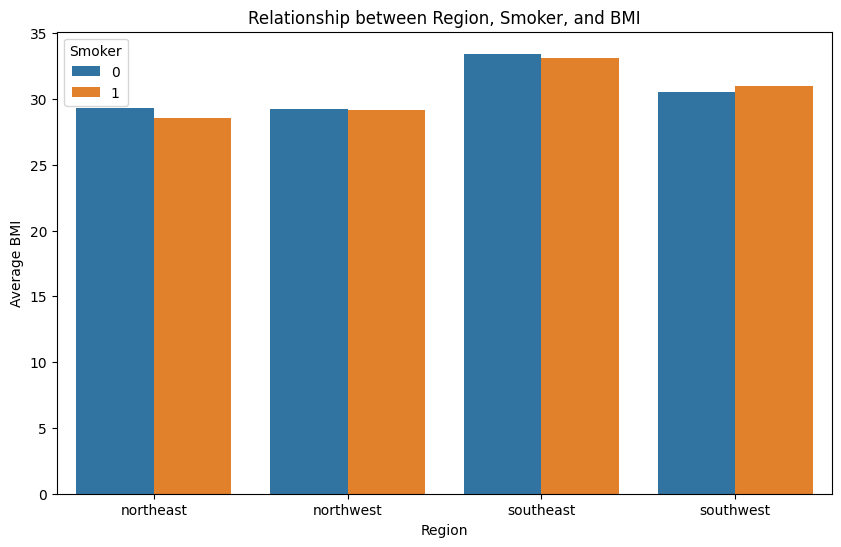

In [54]:
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='bmi', hue='smoker', data=average_bmi_by_region_smoker)
plt.xlabel('Region')
plt.ylabel('Average BMI')
plt.title('Relationship between Region, Smoker, and BMI')
plt.legend(title='Smoker')
plt.show()

<Figure size 1000x600 with 0 Axes>

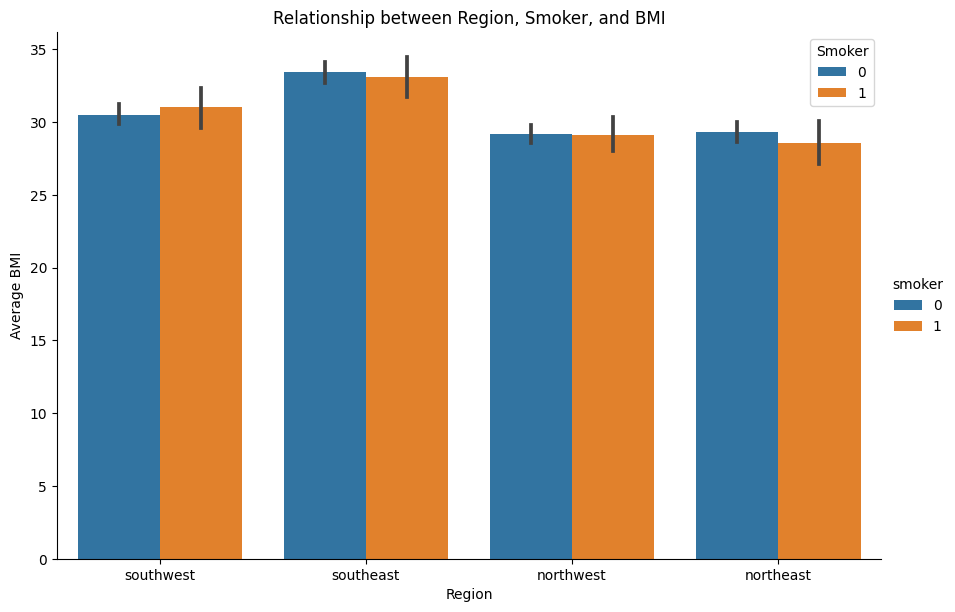

In [55]:
# Create a bar plot using catplot
plt.figure(figsize=(10, 6))
sns.catplot(x='region', y='bmi', hue='smoker', kind='bar', data=df, height=6, aspect=1.5)
plt.xlabel('Region')
plt.ylabel('Average BMI')
plt.title('Relationship between Region, Smoker, and BMI')
plt.legend(title='Smoker')
plt.show()

# **3. Data Processing**

In [56]:
# Use Label Encoding to convert categorical values into numerical.
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])

# Use One-Hot Encoding assign a binary value of 0 to 1
categoricals = ['sex', 'smoker', 'region']
df1 = pd.get_dummies(df, columns=['region'], drop_first=True)
df1

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,1,0,0
1334,18,0,31.920,0,0,2205.98080,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,1


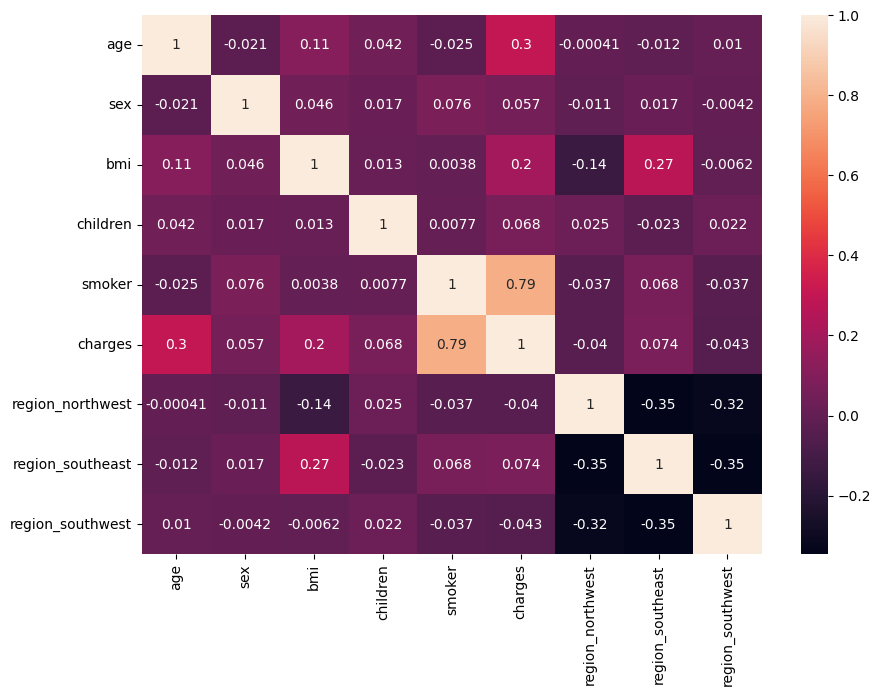

In [57]:
# Correlation
plt.figure(figsize=(10,7))
sns.heatmap(df1.corr(), annot=True)

# Split the dataset into features (X) and target (y)
x = pd.DataFrame(df1, columns=['age', 'bmi', 'children', 'sex', 'smoker',
       'region_northwest', 'region_southeast', 'region_southwest'])

y = df1["charges"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Scale the training set
X_train_scaled = scaler.fit_transform(X_train)

# Scale the testing set using the same scaler
X_test_scaled = scaler.transform(X_test)


There is a correlation between charges and smokers. Also, there is a multicollinearity between regions.

# **4. Model Selection**

In [23]:
# Initialize the regression models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge(),
    'Random Forest': RandomForestRegressor()
}

# Perform cross-validation for each model
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    print(f"{name} RMSE: {rmse_scores.mean()} +/- {rmse_scores.std()}")

Linear Regression RMSE: 6137.925191785953 +/- 402.27051977758816
Lasso Regression RMSE: 6137.536527662129 +/- 401.3653915488488
Ridge Regression RMSE: 6137.561989858697 +/- 400.9495439658483
Random Forest RMSE: 4971.561648036108 +/- 495.5877128882435


  The best performing model is "Random Forest" model with the lowest RMSE.

# **5. Hyper-parameter Optimization**

In [24]:
# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
best_model = RandomForestRegressor()

# Perform Grid Search
grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:")
print(best_params)

Best Parameters:
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


# **6. Model Evaluation**

In [25]:
# Predict on the test set using the optimized model
y_pred = best_model.predict(X_test_scaled)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 18702062.649443984
Root Mean Squared Error: 4324.588147956287
Mean Absolute Error: 2394.1882949573373


The RMSE of 4324.59 indicates that, on average, the predictions are off by about 4324.59 in terms of the insurance cost. The MAE of 2394.19 indicates that, on average, the predictions are off by about 2394.19 dollars.

Text(0.5, 1.0, 'True vs. Predicted Charges')

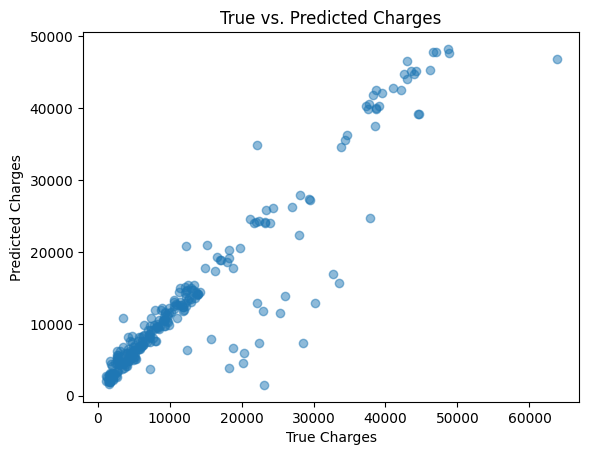

In [32]:
# comparing y values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('True Charges')
plt.ylabel('Predicted Charges')
plt.title('True vs. Predicted Charges')

The points closely follow a diagonal line, it indicates that the model's predictions are accurate.